<center>
 
# Knowledge Representation #
</center>
<br><br>
<h1>Assignment 2</h1><br>
<b>Gaurav Kumar</b><br>
<b>R00171515</b>


<br><br>
Importing the required libraries

In [80]:
from probability import *
from utils import print_table
from notebook import psource, pseudocode, heatmap

i.A.) Finding probability of Snake Eyes

In [81]:
def qOne():

    P = ProbDist('Roll'); P['1'], P['2'], P['3'], P['4'], P['5'], P['6'] = 1/6, 1/6, 1/6, 1/6, 1/6, 1/6;# Probability of each outcome is 1/6
    prob11 = P['1'] + P['1']# Probability of getting 1 on both dices (each outome is exclusive of the other)
    
    print("i.A.) Probability of Snake Eyes is", prob11,"\n")# Printing the probability of getting(1,1)

ii.Qi.) <h3>Constrcting a Bayesian Network</h3><br>

<b>Variables</b>: Traffic (T), Rain (R), Motorway (M), Late (L), BossCalls (B)
<br><br><b>Network Topology</b>:
<pre>-Sometimes you decide to take the Motorway
-Rain can result in you being late
-Traffic can result in you being late.
-Being late can cause your boss to call.
</pre>

<br>

The Resulting Bayesian Network is:

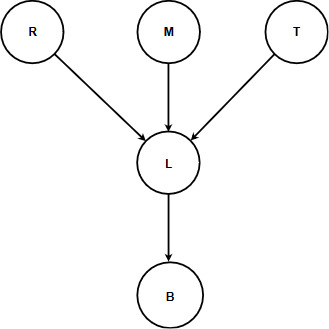

<h4>ii.Qiii.)</h4>

In [82]:
def qTwo(bn):
    
    print("ii.Qiii.) CPT for the Late node is :",bn.variable_node('Late').cpt,"\n")
    # Priting the Conditional Probability Table (CPT) of the node 'Late' from the Bayesian Network
    
    motorway_node = BayesNode('Motorway', '', 0.01)
    # Creating a BayesNode of 'Motorway'
    
    print("ii.Qiii.a.) Probability you take the motorway is :",motorway_node.p(True, {}))
    # Printing the probability of taking motorway to go to office
    
    boss_node = BayesNode('Boss_Calls', 'Late', {T: 0.80, F: 0.10})
    # Creating a BayesNode of 'Boss_Calls'
    
    print("ii.Qiii.b.) Probability the boss does not call given that you are late is :",boss_node.p(False, {'Late' : True}))
    # Printing the probability of Boss doesn't call even if you are late.
    
    late_node = BayesNode('Late', 'Rain Traffic Motorway',{(T, T, T): 0.80, (T, T, F): 0.98, (T, F, T): 0.2, (T, F, F): 0.3, (F, T, T): 0.25, (F, T, F): 0.24, (F, F, T): 0.001, (F, F, F): 0.05})
    # Creating a BayesNode of 'Late'
    
    print("ii.Qiii.c.) Probability you are late when its raining & there is traffic as you took the Motorway is :",late_node.p(True, {'Rain' : True, 'Traffic' : True, 'Motorway' : True}),"\n")
    # Printing the probability of you are late when its raining & there is traffic as you took the Motorway.

<h3>iii.) Exact Inference in Bayesian Networks</h3>

<h4>A.) Inference by Enumeration</h4>

In [83]:
def qThree(bn):
    
    ans_dist = enumeration_ask('Rain', {'Boss_Calls': True}, bn)# Getting inference of 'Rain' given that the Boss calls
    print("iii.Qi.a.) It is raining when the Boss calls",ans_dist[True]*100,"% of the time")
    #Printing the percentage of the times it is raining when the boss calls
    
    ans_dist = enumeration_ask('Rain', {'Boss_Calls': True}, bn)# Getting inference of 'Rain' given that the Boss calls
    print("\t\tIt is not raining when the Boss calls",ans_dist[False]*100,"% of the time\n")
    #Printing the percentage of the times it is not raining when the boss calls
    
    ans_dist = enumeration_ask('Traffic', {'Boss_Calls': True}, bn)# Getting inference of 'Traffic' given that the Boss calls
    print("iii.Qi.b.) There is traffic when the Boss calls around",ans_dist[True]*100,"% of the time")
    #Printing the percentage of the times you were stuck in Traffic when the boss calls
    
    ans_dist = enumeration_ask('Traffic', {'Boss_Calls': True}, bn)# Getting inference of 'Traffic' given that the Boss calls
    print("\t\tThere is no traffic when the Boss calls around",ans_dist[False]*100,"% of the time\n")
    #Printing the percentage of the times you were stuck in Traffic when the boss calls
    
    ans_dist = enumeration_ask('Motorway', {'Boss_Calls': True}, bn)# Getting inference of 'Motorway' given that the Boss calls
    print("iii.Qi.c.) I am using the Motorway when the Boss calls around",ans_dist[True]*100,"% of the time")
    #Printing the percentage of the times you took motorway when the boss calls
    
    ans_dist = enumeration_ask('Motorway', {'Boss_Calls': True}, bn)# Getting inference of 'Motorway' given that the Boss calls
    print("\t\tI am not using the Motorway when the Boss calls around",ans_dist[False]*100,"% of the time\n")
    #Printing the percentage of the times you took motorway when the boss calls
    
    ans_dist = enumeration_ask('Boss_Calls', {'Traffic': True, 'Rain' : True}, bn)# Getting inference of 'Boss_Calls' given that there is traffic and it is raining
    print("iii.Qi.d.) The Boss calls when it is raining and there is Traffic around",ans_dist[True]*100,"% of the time")
    #Printing the percentage of the times it is raining when the boss calls
    
    ans_dist = enumeration_ask('Boss_Calls', {'Traffic': True, 'Rain' : True}, bn)# Getting inference of 'Rain' given that there is traffic and it is raining
    print("\t\tThe Boss does not call when it is raining and there is Traffic around",ans_dist[False]*100,"% of the time")
    #Printing the percentage of the times the boss calls when there is traffic and it is raining

Creating Bayesian Network using BayesNet code from AIMA repository

In [84]:
def BN():
    
    T, F = True, False# Setting the variables T and F to boolean values True and False respectively.

    lateToOffice = BayesNet([
    ('Rain', '', 0.41),# Setting probability of Rain to the given value 0.41
    ('Traffic', '', 0.15),# Setting probability of Traffic to the given value 0.15
    ('Motorway', '', 0.01),# Setting probability of Motorway to the given value 0.01
    ('Late', 'Rain Traffic Motorway', {(T, T, T): 0.80, (T, T, F): 0.98, (T, F, T): 0.2, (T, F, F): 0.3, (F, T, T): 0.25, (F, T, F): 0.24, (F, F, T): 0.001, (F, F, F): 0.05}),
    # Setting the conditional probability of getting Late given that there is Rain and/or Traffic and/or Motorway
    ('Boss_Calls', 'Late', {T: 0.80, F: 0.10})# Setting the conditional probability of Boss calls given that you are Late to office
    ])    
    
    return lateToOffice# Returning the bayesian network

In [85]:
beliefNetwork = BN()# Calling the BN function to create Bayesian Network

qOne()# Calling qOne function
qTwo(beliefNetwork)# Calling qTwo function passing the bayesian network as an argument
qThree(beliefNetwork)# Calling qThree function passing the bayesian network as an argument

i.A.) Probability of Snake Eyes is 0.3333333333333333 

ii.Qiii.) CPT for the Late node is : {(True, True, True): 0.8, (True, True, False): 0.98, (True, False, True): 0.2, (True, False, False): 0.3, (False, True, True): 0.25, (False, True, False): 0.24, (False, False, True): 0.001, (False, False, False): 0.05} 

ii.Qiii.a.) Probability you take the motorway is : 0.01
ii.Qiii.b.) Probability the boss does not call given that you are late is : 0.19999999999999996
ii.Qiii.c.) Probability you are late when its raining & there is traffic as you took the Motorway is : 0.8 

iii.Qi.a.) It is raining when the Boss calls 63.10068386372213 % of the time
		It is not raining when the Boss calls 36.89931613627787 % of the time

iii.Qi.b.) There is traffic when the Boss calls around 29.107803254955645 % of the time
		There is no traffic when the Boss calls around 70.89219674504434 % of the time

iii.Qi.c.) I am using the Motorway when the Boss calls around 0.8049442854868619 % of the time
		I am not

<b>iii.) Qii.) Inference by Enumeration</b> helps to get the probability distribution of a query variable 'X' given the observed (evidence) variable(s) 'e' from the bayesian network 'bn'.

The general query for inference by enumeration is:

P(X, $e_{1-n}$, bn)

Along with the observed variables, there can be some hidden variables.
For eg. in iii.Qi.A) <b>It is raining when the Boss calls X% of the time</b>; the observed variable 'e' is 'boss calls' and the query variable 'X' is 'Rain'. Here, the hidden variables are 'Motorway', 'Traffic' and 'Late'. Inference by enumeration will take these variable also into consideration to find the joint probability distribution of 'Rain' given 'Boss Calls' as below:

P('Rain'|'Boss Calls')<br>
=P('Rain','Boss Calls')/P('Boss Calls')<br>
=α * P('Rain','Boss Calls')<br>
=α * $Σ_{motorway}$$Σ_{traffic}$$Σ_{late}$ * P('Rain','Motorway','Traffic','Late','Boss Calls')<br>
=α * P('Rain')$Σ_{motorway}$ * P('Motorway')$Σ_{traffic}$ * P('Traffic')$Σ_{late}$ * P('Late'|'Rain','Motorway','Traffic') * P('Boss Calls'|'Late')<br>

Here, α = 1/P('Boss Calls')

Similarly, for the other parts of iii.Qi.

It typically creates a new table from the given joint distribution table that matches the given evidence, adds up the hidden variables in the newly created table and normalizes the result.

